# Which state has more Prisoners in USA?

### The goal is to figure out 10 states which has the more incarcerated people

* To accomplish the task will be used a dataset about crime and incarceration in US
* And also, there will an runtime comparison among the Heap Sort and Radix Sort used to sort the states

## Heap Sort

In [64]:
def heapify(array, size, i): 
    largest = i  
    left_child = 2 * i + 1
    right_child = 2 * i + 2
   
    if left_child < size and array[i] < array[left_child]: 
        largest = left_child 
   
    if right_child < size and array[largest] < array[right_child]: 
        largest = right_child
   
    if largest != i:
        array[i],array[largest] = array[largest],array[i] 
   
        heapify(array, size, largest) 
        
def heapSort(array):
        
    size = len(array)
  
    for i in range(size, -1, -1): 
        heapify(array, size, i) 
     
    for i in range(size-1, 0, -1): 
        array[i], array[0] = array[0], array[i] 
        heapify(array, i, 0)
    
    return array

## Radix Sort

In [65]:
# Radix Sort
    
def countingSort(array, exp): 
    
    size = len(array) 
    output = [0] * size
    count = [0] * 10 
    
    for i in range(0, size): 
        index = (array[i]/exp) 
        count[ int((index)%10) ] += 1

    for i in range(1,10): 
        count[i] += count[i-1] 
     
    i = size-1
    while i>=0: 
        index = (array[i]/exp) 
        output[ count[ int((index)%10) ] - 1] = array[i] 
        count[ int((index)%10) ] -= 1
        i -= 1
   
    i = 0
    for i in range(0,len(array)): 
        array[i] = output[i] 
         

def radixSort(array):
    m = max(array)
    
    exp = 1
    while m/exp > 0:
        countingSort(array, exp)
        exp*=10
        
    return array

## Importing libraries

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

sns.set()

## Importing the dataset

In [67]:
data = pd.read_csv('dataset/crime_and_incarceration_by_state.csv')

test_case_1 = data.values
test_case_2 = data.values

## Initializing Algorithms Runtime tests

In [68]:
runtime = []

start = time.time()
heapSort(test_case_1[1:, 3])
end = time.time()
runtime.append(end - start)

In [69]:
start = time.time()
radixSort(test_case_2[1:, 3])
end = time.time()
runtime.append(end - start)

## Visualizing the Runtime results

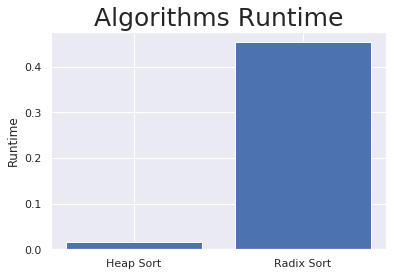

In [70]:
algorithms = ['Heap Sort', 'Radix Sort']
plt.title('Algorithms Runtime', fontsize=25)
plt.ylabel('Runtime')
plt.bar(algorithms, runtime)
plt.show()

## Visualizing which states have  more prisonners

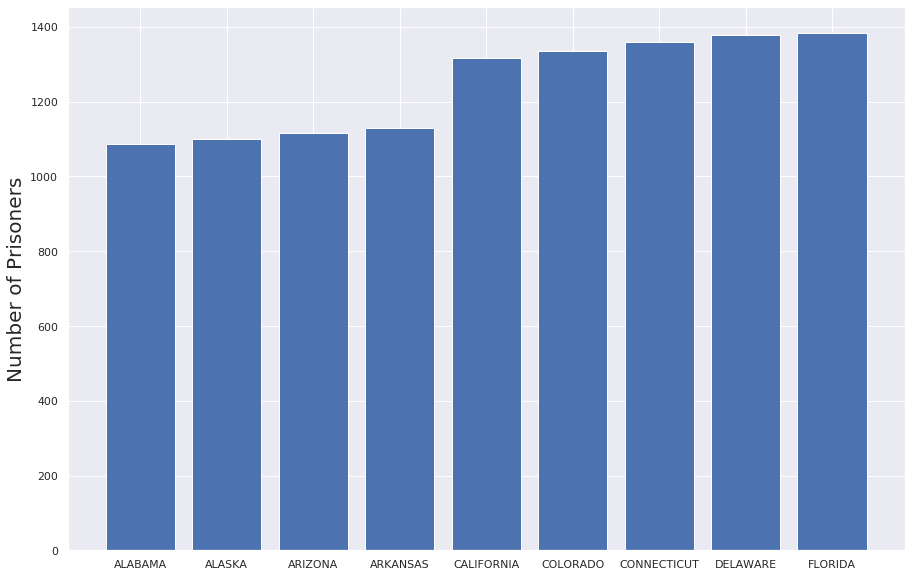

In [71]:
plt.figure(figsize = (15, 10))
plt.ylabel('Number of Prisoners', fontsize=20)
plt.bar(test_case_1[1:10, 0], test_case_1[1:10, 3])
plt.show()

## Conclusion

By the end of this experiment, it is conclude that:

* Florida, Delaware and Connecticut are the states with the bigger amount of prisonners

And also:

* Heap Sort had a smaller runtime in comparison to Radix Sort in the state's sort